In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import seaborn as sns

In [514]:
data=pd.read_csv('Churn_Modelling.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [515]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [516]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [517]:
#check the unique columns
for col in data.columns:
    print(f'columns : {col} and his persantage is {len(data[col].unique()) / len(data) }')

columns : RowNumber and his persantage is 1.0
columns : CustomerId and his persantage is 1.0
columns : Surname and his persantage is 0.2932
columns : CreditScore and his persantage is 0.046
columns : Geography and his persantage is 0.0003
columns : Gender and his persantage is 0.0002
columns : Age and his persantage is 0.007
columns : Tenure and his persantage is 0.0011
columns : Balance and his persantage is 0.6382
columns : NumOfProducts and his persantage is 0.0004
columns : HasCrCard and his persantage is 0.0002
columns : IsActiveMember and his persantage is 0.0002
columns : EstimatedSalary and his persantage is 0.9999
columns : Exited and his persantage is 0.0002


In [518]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [519]:
import pickle
def save_object(obj,name):
    pickle_obj=open(f'{name}.pck','wb')
    pickle.dump(obj,pickle_obj)
    pickle_obj.close()


In [520]:
# label encoder the object datatype
from sklearn.preprocessing import LabelEncoder
d_type=dict(data.dtypes)
for name ,type_ in d_type.items():
    if type_=='object':
        label=LabelEncoder()
        data[name]=label.fit_transform(data[name])
        save_object(label,f'LabelEncoder_{name}')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [521]:
# one hot encoder geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
encoder=onehot_encoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()
save_object(onehot_encoder,'OneHotEncoder_Geography')
#values=dict(data['Geography'].value_counts())
values=data['Geography'].unique()

data=data.drop('Geography',axis=1)
for val in values:
    data['Geography' +str(val) ]=encoder[:,val]
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography0,Geography2,Geography1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [522]:
remaining_columns=list(data.columns)
remaining_columns.remove('Exited')
save_object(remaining_columns,'columns')

In [523]:
remaining_columns

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography0',
 'Geography2',
 'Geography1']

In [524]:
#features and the target
x=data[remaining_columns].values
y=data['Exited'].values.astype(np.uint8)

In [525]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,shuffle=True)

print(f'x_train shape {x_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'x_train shape {x_test.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (8000, 12)
y_train shape (8000,)
x_train shape (2000, 12)
y_test shape (2000,)


In [526]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x=scaler.transform(x)
x_train[:1],x_test[:1]
save_object(scaler,'scaler')

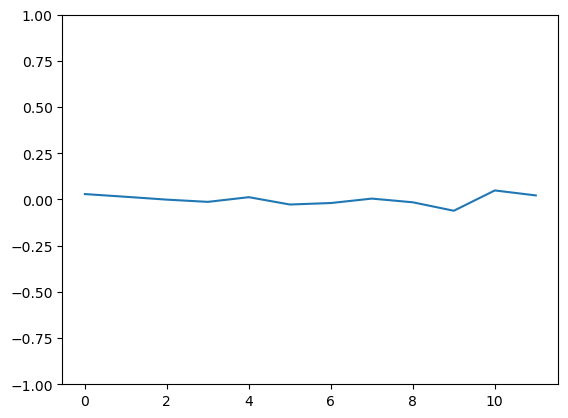

In [527]:
#check if datais standardized or not
#means should be 1
plt.ylim(-1,1)
means=[]
for i in range(x.shape[1]):
    means.append(np.mean(x_test[:,i]))
plt.plot(means)

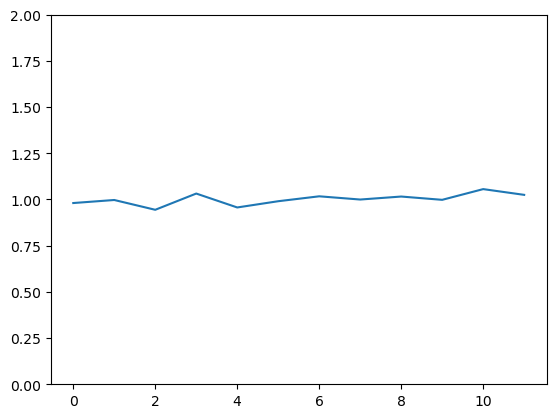

In [528]:
plt.ylim(0,2)
vars=[]
for i in range(x.shape[1]):
    vars.append(np.var(x_test[:,i]))
plt.plot(vars)

In [529]:
value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [530]:
class_weights = {0 : 20.37 , 1 : 79.63}

In [531]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(class_weight=class_weights)
model.fit(x_train , y_train)

predictions = model.predict(x_test)
save_object(model , "MyModel")
pred_probs = model.predict_proba(x_test)

In [532]:
# Get the probs of only Churn = "1"

pred_probs = pred_probs[:, 1]

[[1134  463]
 [ 113  290]]


<Axes: >

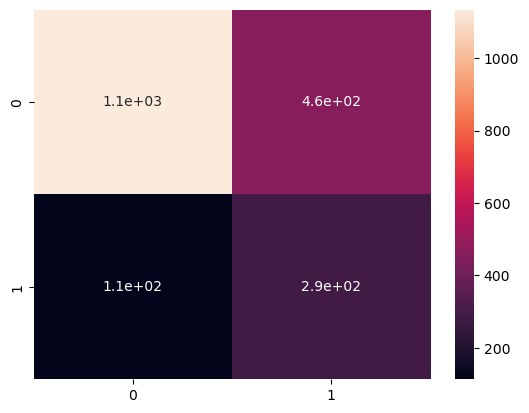

In [533]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,\
                            recall_score,roc_curve,roc_auc_score

matrix = confusion_matrix(y_test , predictions)
print(matrix)
sns.heatmap(matrix , annot=True)

In [534]:
def Accuracy(y_truths, y_pred):
    return np.mean(y_truths==y_pred)
print("Validation Accuracy : " , Accuracy(y_test , predictions))

Validation Accuracy :  0.712


In [535]:
# Checking precision

print("Precision : " , precision_score(y_test , predictions))

# Checking recall

print("Precision : " , recall_score(y_test , predictions))

Precision :  0.3851261620185923
Precision :  0.7196029776674938


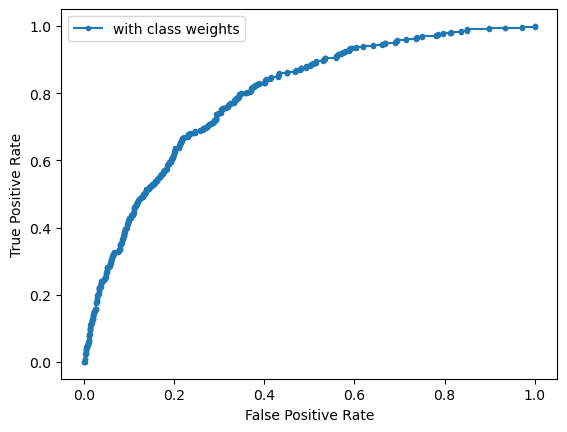

 Area Under Curve :  0.7908827189938952


In [536]:
Fpr, Tpr, _ = roc_curve(y_test, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='with class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Auc = roc_auc_score(y_test, pred_probs)
print(" Area Under Curve : " , Auc)

**Realtime Prediction**

In [537]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [538]:
def load_object(name):
    pickle_obj=open(f'{name}.pck','rb')
    obj=pickle.load(pickle_obj)
    return obj

In [539]:
#load the data
data=pd.read_csv('Churn_Modelling.csv')



In [540]:
#take sample from the dataset
import random
value=random.randint(1,1000)
to_be_predicted=data.iloc[value,:].values
col_names=data.columns

predict_dict={}
for col_name,value in  zip(col_names,to_be_predicted):
    predict_dict[col_name]=value

predict_dict

{'RowNumber': 954,
 'CustomerId': 15671139,
 'Surname': 'Brizendine',
 'CreditScore': 694,
 'Geography': 'Spain',
 'Gender': 'Male',
 'Age': 39,
 'Tenure': 0,
 'Balance': 107042.74,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 102284.2,
 'Exited': 0}

In [541]:
del predict_dict['RowNumber']
del predict_dict['CustomerId']
del predict_dict['Surname']

In [542]:
real_output=predict_dict['Exited']
del predict_dict['Exited']

In [543]:
predict_dict['Gender']=load_object('LabelEncoder_Gender').transform(np.array(predict_dict['Gender']).reshape(-1,))[0]

In [544]:
predict_dict['Geography']=load_object('LabelEncoder_Geography').transform(np.array(predict_dict['Geography']).reshape(-1,))[0]

In [545]:
predict_dict

{'CreditScore': 694,
 'Geography': 2,
 'Gender': 1,
 'Age': 39,
 'Tenure': 0,
 'Balance': 107042.74,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 102284.2}

In [546]:
predict_dict["Geography_ohe"] = load_object("OneHotEncoder_Geography").transform(predict_dict["Geography"].reshape(-1,1)).toarray()[0]

In [547]:
predict_dict

{'CreditScore': 694,
 'Geography': 2,
 'Gender': 1,
 'Age': 39,
 'Tenure': 0,
 'Balance': 107042.74,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 102284.2,
 'Geography_ohe': array([0., 0., 1.])}

In [548]:
del predict_dict['Geography']

In [549]:
for e , i in enumerate(predict_dict["Geography_ohe"]):
    predict_dict["Geography"+ str(e)] = i
predict_dict

{'CreditScore': 694,
 'Gender': 1,
 'Age': 39,
 'Tenure': 0,
 'Balance': 107042.74,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 102284.2,
 'Geography_ohe': array([0., 0., 1.]),
 'Geography0': 0.0,
 'Geography1': 0.0,
 'Geography2': 1.0}

In [550]:
del predict_dict['Geography_ohe']

In [551]:
predict_dict

{'CreditScore': 694,
 'Gender': 1,
 'Age': 39,
 'Tenure': 0,
 'Balance': 107042.74,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 102284.2,
 'Geography0': 0.0,
 'Geography1': 0.0,
 'Geography2': 1.0}

In [552]:
# Lets make the main array 

col_sequence = load_object("columns")
array = []

for col_name in col_sequence :
    array.append(predict_dict[col_name])

array = np.array(array)

print(array)

[6.9400000e+02 1.0000000e+00 3.9000000e+01 0.0000000e+00 1.0704274e+05
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0228420e+05 0.0000000e+00
 1.0000000e+00 0.0000000e+00]


In [553]:
array=load_object('scaler').transform(array.reshape(1,-1))

In [554]:
prediction=load_object('MyModel').predict(array)[0]
prediction

0

In [555]:
print('original :',real_output , 'prediction : ',prediction)

original : 0 prediction :  0
